# Evaluate Usage Data

In [1]:
# ------------------
# Import libraries
# ------------------

import pandas as pd  # Provides dataframe   
import matplotlib.pyplot as plt  # Plot data
import pickle        # Save and load data

## Import dataframe and license info

In [2]:
# ---------------------------------------
# Import dataframe and license info dict
# ---------------------------------------

#### PARAMETER SETTING #################
datasetFileName      = "myDataFrame.pkl" 
licenseInfoFileName = "licenseInfo.pkl"
########################################

# Load dataframe
dataset = pd.read_pickle(datasetFileName)

# Load license info data
with open( licenseInfoFileName, 'rb') as f:
    licenseInfo = pickle.load(f)
    
# Show data
display(dataset.head(6))

licenseInfo

,License Number,Version,Start time,End time,Toolbox
0,102,1.0,2020-05-25 08:30:00,2020-05-25 09:30:00,Matlab
1,102,1.0,2020-05-25 10:15:00,2020-05-25 10:30:00,Matlab
2,102,1.0,2020-05-27 07:00:00,2020-05-27 17:30:00,Matlab
3,101,1.0,2020-05-24 10:15:00,2020-05-24 10:30:00,Matlab
4,101,1.0,2020-05-24 17:15:00,2020-05-24 18:00:00,Matlab
5,101,1.0,2020-05-25 11:00:00,2020-05-25 15:00:00,Matlab


{101: ['Matlab', 'Simulink'],
 102: ['Matlab'],
 105: ['Matlab'],
 113: ['Matlab', 'Simulink']}

# Evaluate overall usage (= all users)

In [3]:
#### PARAMETER SETTING #############

# Filter by start & end time
startTime = '26.05.2020 00:00'
endTime   = '30.05.2020 23:59'

# Toolboxes to be considered 
#toolboxes = ["Matlab"]   
toolboxes = None   # None =  all toolboxes

,,Usage time
License Number,Toolbox,
113,Matlab,0.000000
105,Matlab,2.150000
102,Matlab,10.500000
101,Matlab,26.266667


,,Usage time
License Number,Toolbox,
101,Simulink,0.0
113,Simulink,0.0


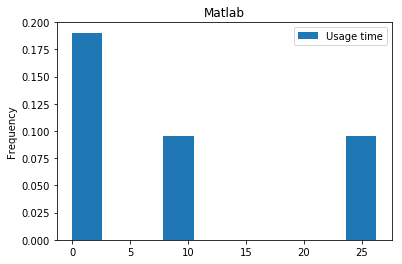

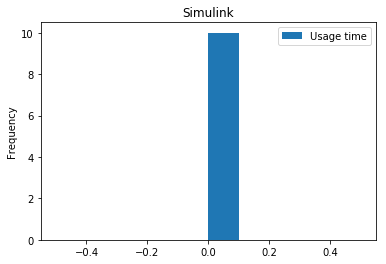

In [4]:
# ------------------------------------
# Calculate, list and plot usage time
# ------------------------------------

# Convert start-end time to pandas timestamp
startTime = pd.to_datetime(startTime, format='%d.%m.%Y %H:%M')
endTime = pd.to_datetime(endTime, format='%d.%m.%Y %H:%M')

# Filter dataframe by date and time
filterStart = (dataset['Start time'] >= startTime)
filterEnd =   (dataset['End time']   <= endTime)

datasetTime = dataset[filterStart & filterEnd] 

# Add "dummy" entries of zero time for each license and toolbox
for key, values in licenseInfo.items():
    for tbox in values:
        new_row = {'License Number':key, 'Version':'0.0', 'Start time':startTime, 'End time':startTime, 'Toolbox':tbox }
        #display(new_row)
        datasetTime = datasetTime.append(new_row, ignore_index=True)

# Add new column (Usage time in hours)        
datasetTime['Usage time'] = (datasetTime['End time']-datasetTime['Start time']).dt.total_seconds()/(60*60)  


# Filter by toolboxes, list and plot data
if not toolboxes:
    toolboxes = datasetTime['Toolbox'].unique()
    
for toolbox in toolboxes:
    data_view = datasetTime[datasetTime['Toolbox'] == toolbox]
    data_view = data_view[['License Number','Toolbox','Usage time']].groupby(['License Number','Toolbox']).sum()
    data_view = data_view.sort_values(by=['Toolbox','Usage time'], ascending=True)
    display(data_view)

    data_view.plot(kind = 'hist', bins = 10, title = toolbox, density = True)

# Evaluate individual usage (= one license)

In [7]:
### PARAMETER SETTING ##########

# license number
licenseNo = 101

# time filter
startTime = '26.05.2019 00:00'
endTime   = '30.05.2022 23:59'

#################################

print("Available toolboxes for license No. " + str(licenseNo) + ":")
licenseInfo[licenseNo]

Available toolboxes for license No. 101:


['Matlab', 'Simulink']

In [12]:
# ----------------------------------------------
# Create and show total & individual usage time
# ----------------------------------------------

# Filter by license no
datasetUserTime = dataset[dataset['License Number'] == licenseNo]

# Filter by date and time
startTime = pd.to_datetime(startTime, format='%d.%m.%Y %H:%M')
endTime = pd.to_datetime(endTime, format='%d.%m.%Y %H:%M')

filterStart = (datasetUserTime['Start time'] >= startTime)
filterEnd =   (datasetUserTime['End time']   <= endTime)
datasetUserTime = datasetUserTime[filterStart & filterEnd] 

# Add "dummy" entries of zero time for each license and toolbox
numberEntries = len(datasetUserTime)

for toolbox in licenseInfo[licenseNo]:
    new_row = {'License Number':licenseNo, 'Version':'0.0', 'Start time':startTime, 'End time':startTime, 'Toolbox':toolbox }
    #display(new_row)
    datasetUserTime = datasetUserTime.append(new_row, ignore_index=True)

# Add new column (Usage time in hours)        
datasetUserTime['Usage time'] = (datasetUserTime['End time']-datasetUserTime['Start time']).dt.total_seconds()/(60*60)  

# Display first entries of dataset
datasetUserTime.sort_values(by=['Start time', 'License Number'], ascending=True)
display(datasetUserTime)

# Display total Usage time per toolbox
data_view = datasetUserTime[['License Number','Toolbox','Usage time']].groupby(['License Number','Toolbox']).sum()
data_view = data_view.sort_values(by=['Toolbox','Usage time'], ascending=True)
data_view

,License Number,Version,Start time,End time,Toolbox,Usage time
0,101,1,2020-05-24 10:15:00,2020-05-24 10:30:00,Matlab,0.250000
1,101,1,2020-05-24 17:15:00,2020-05-24 18:00:00,Matlab,0.750000
2,101,1,2020-05-25 11:00:00,2020-05-25 15:00:00,Matlab,4.000000
3,101,1,2020-05-25 11:15:00,2020-05-25 12:03:00,Simulink,0.800000
4,101,1,2020-05-28 09:07:00,2020-05-29 11:23:00,Matlab,26.266667
5,101,0.0,2019-05-26 00:00:00,2019-05-26 00:00:00,Matlab,0.000000
6,101,0.0,2019-05-26 00:00:00,2019-05-26 00:00:00,Simulink,0.000000


Usage time
License Number Toolbox             
101            Matlab     31.266667
               Simulink    0.800000

In [15]:
# -----------------------------------
# Function: calcUsageTime()
# -----------------------------------

# Calculates the usage time for a given licenseNo, toolbox, and time interval.

def calcUsageTime(licenseNo, toolbox, startTime, endTime):
    
    # Filter by user name
    datasetUserTime = dataset[dataset['License Number'] == licenseNo]
    
    # Filter by toolbox
    datasetUserTime = datasetUserTime[datasetUserTime['Toolbox'] == toolbox] 
    
    # Filter by date and time
    startTime = pd.to_datetime(startTime, format='%d.%m.%Y %H:%M')
    endTime = pd.to_datetime(endTime, format='%d.%m.%Y %H:%M')
    
    filterStart = (datasetUserTime['Start time'] < endTime)
    filterEnd =   (datasetUserTime['End time']   > startTime)
    datasetUserTime = datasetUserTime[filterStart & filterEnd] 
    
    # Clamp times that overlap neigboring time regions
    datasetUserTime[datasetUserTime['Start time'] < startTime] = startTime;
    datasetUserTime[datasetUserTime['End time'] > endTime] = endTime;
    
    # Add "dummy" entries of zero time for each license and toolbox
    numberEntries = len(datasetUserTime)
    
    new_row = {'License Number':licenseNo, 'Version':'0.0', 'Start time':startTime, 'End time':startTime, 'Toolbox':toolbox }
    datasetUserTime = datasetUserTime.append(new_row, ignore_index=True)
    
    # Add new column (Usage time in hours)        
    datasetUserTime['Usage time'] = (datasetUserTime['End time']-datasetUserTime['Start time']).dt.total_seconds()/(60*60)  
    
    # Display first entries of dataset
    return datasetUserTime['Usage time'].sum()

Toolbox
Matlab      AxesSubplot(0.125,0.125;0.775x0.755)
Simulink    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

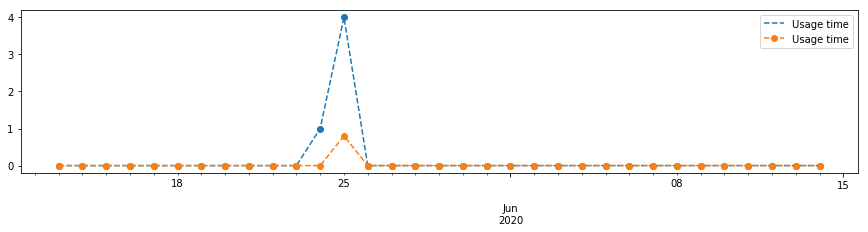

In [23]:
### PARAMETER SETTING ####
licenseNo = 101
startDay = '13.05.2020'
endDay = '14.06.2020'
step = 1 
##########################

#toolbox = 'Matlab'
toolboxes = licenseInfo[licenseNo];


userDataset = pd.DataFrame(columns=['Day', 'Toolbox', 'Usage time']);

startDay_ts = pd.to_datetime( startDay, format='%d.%m.%Y')
endDay_ts = pd.to_datetime( endDay + ' 23:59', format='%d.%m.%Y %H:%M')

numberDays = (endDay_ts - startDay_ts).days + 1

# Loop over all days within start and end time
for toolbox in toolboxes:
    day = startDay_ts
    idx = 1;
    for cc in range(numberDays):
        #if day.day_name() == 'Saturday' or day.day_name() == 'Sunday':
        #    day = day + pd.Timedelta(days= step)
        #    continue;
       # print( "day = " + str(day) + " Type = " + str(day.day_name()))
        usageTime = calcUsageTime(licenseNo, toolbox, day, day + pd.Timedelta(days=step))
        
        new_row = {'Day':day, 'Toolbox':toolbox, 'Usage time':usageTime }
        #userDataset = userDataset.append(new_row, ignore_index=True)
        #new_row = pd.Series(new_row, name = idx);
        new_row = pd.Series(new_row, name = day);
        userDataset = userDataset.append(new_row)
            
        day = day + pd.Timedelta(days= step)
        idx = idx + 1;
    
#display(userDataset)

fig1, ax1 = plt.subplots(1,1, figsize = (15, 3))
res = userDataset.groupby(['Toolbox'])[['Usage time']]
res.plot(style = '--o', ax = ax1) 